In [25]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings
warnings.filterwarnings('ignore')

In [79]:
#Name of the interaction files that you want to compare
#(4-times replicas of one DNMT3A-DNA complex-- CGC,CGG,CGT,CGA)

file_1="3a-cgt-1-filtered.hbond"
file_2="3a-cgt-2-filtered.hbond"
file_3="3a-cgt-3-filtered.hbond"
file_4="3a-cgt-4-filtered.hbond"

### Sim1

In [80]:
input_files = os.path.join('DNMT3A_inputs')

a=pd.read_csv(input_files+"/"+file_1, sep="\t", header=None)
a.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]
a = a[a.itype != "itype"]
a['Type'] = 'sim-1'

a['resid_a'] = a['resid_a'].astype(int)
a['resid_a'] = a['resid_a'] + 629

a["resname_a"] = a["resname_a"].astype(str) + a["resid_a"].astype(str)

a=a.drop(columns=['resid_a'])

a_inter = a.loc[((a["chain_a"] == "A") & (a["chain_b"] == "B")) | ((a["chain_a"] == "A") & (a["chain_b"] == "C")) ]

a_spec = a_inter.drop(a_inter.index[a_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

a_spec_res = a_spec.drop(a_spec.index[a_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])
a_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
77,hbond,A,B,ARG720,DA,291,NH2,N3,sim-1
78,hbond,A,B,ARG720,DC,290,NH2,O2,sim-1
134,hbond,A,C,ARG790,DC,298,NH1,O2,sim-1
135,hbond,A,C,ARG790,DC,298,NH2,N3,sim-1
136,hbond,A,C,ARG790,DC,298,NH2,O2,sim-1
...,...,...,...,...,...,...,...,...,...
209005,hbond,A,C,ARG790,DC,298,NH2,N3,sim-1
209006,hbond,A,C,ARG790,DC,298,NH2,O2,sim-1
209040,hbond,A,C,ARG836,DT,300,NE,O4,sim-1
209042,hbond,A,C,ARG836,DG,299,NH2,O6,sim-1


In [81]:
#Function for convert residue number of nucleotides to nucleotide position
def nucleotide_pos(df):
    df['resid_b'] = df['resid_b'].astype(str).str.replace('284',"(+5')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('285',"(+4')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('286',"(+3')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('287',"(+2')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('288',"(+1')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('289',"(0')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('290',"(-1')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('291',"(-2')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('292',"(-3')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('293',"(-4')")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('294',"(-4)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('295',"(-3)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('296',"(-2)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('297',"(-1)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('298',"(0)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('299',"(+1)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('300',"(+2)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('301',"(+3)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('302',"(+4)")
    df['resid_b'] = df['resid_b'].astype(str).str.replace('303',"(+5)")

nucleotide_pos(a_spec_res)


In [82]:
a_spec_res['resname_a'] = a_spec_res['resname_a'].str.title()
a_spec_res['atom_pair'] = a_spec_res['resname_a']+"-"+a_spec_res['atom_a']+"-"+ a_spec_res['resid_b']+"-"+ a_spec_res['atom_b']
# of atom pairs
a_spec_res['atom_freq'] = a_spec_res.groupby('atom_pair')['atom_pair'].transform('count')
a_spec_res=a_spec_res.sort_values(('atom_freq') , ascending=False)
a_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,atom_pair,atom_freq
109970,hbond,A,C,Arg790,DC,(0),NH1,O2,sim-1,Arg790-NH1-(0)-O2,801
150967,hbond,A,B,Arg720,DC,(-1'),NH2,O2,sim-1,Arg720-NH2-(-1')-O2,801
62435,hbond,A,B,Arg720,DC,(-1'),NH2,O2,sim-1,Arg720-NH2-(-1')-O2,801
150170,hbond,A,B,Arg720,DC,(-1'),NH2,O2,sim-1,Arg720-NH2-(-1')-O2,801
62230,hbond,A,C,Arg790,DC,(0),NH1,O2,sim-1,Arg790-NH1-(0)-O2,801
...,...,...,...,...,...,...,...,...,...,...,...
101498,hbond,A,B,Arg887,DA,(+5'),NH2,N1,sim-1,Arg887-NH2-(+5')-N1,1
120393,hbond,A,B,Asn838,DA,(+3'),OD1,N6,sim-1,Asn838-OD1-(+3')-N6,1
121133,hbond,A,B,Arg887,DA,(+5'),NH2,N7,sim-1,Arg887-NH2-(+5')-N7,1
69663,hbond,A,B,Ser837,DA,(+5'),OG,N1,sim-1,Ser837-OG-(+5')-N1,1


### Sim2

In [83]:
input_files = os.path.join('DNMT3A_inputs')

b=pd.read_csv(input_files+"/"+file_2, sep="\t", header=None)
b.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]
b = b[b.itype != "itype"]
b['Type'] = 'sim-2'

b['resid_a'] = b['resid_a'].astype(int)
b['resid_a'] = b['resid_a'] + 629

b["resname_a"] = b["resname_a"].astype(str) + b["resid_a"].astype(str)

b=b.drop(columns=['resid_a'])

b_inter = b.loc[((b["chain_a"] == "A") & (b["chain_b"] == "B")) | ((b["chain_a"] == "A") & (b["chain_b"] == "C")) ]

b_spec = b_inter.drop(b_inter.index[b_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

b_spec_res = b_spec.drop(b_spec.index[b_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])
nucleotide_pos(b_spec_res)
b_spec_res


,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
79,hbond,A,B,ARG720,DC,(-1'),NH2,O2,sim-2
136,hbond,A,C,ARG790,DC,(0),NE,O2,sim-2
330,hbond,A,B,ARG720,DC,(-1'),NH2,O2,sim-2
381,hbond,A,C,ARG790,DC,(0),NE,O2,sim-2
383,hbond,A,C,ARG790,DC,(0),NH2,O2,sim-2
...,...,...,...,...,...,...,...,...,...
207992,hbond,A,B,ARG720,DC,(-1'),NH2,O2,sim-2
208039,hbond,A,C,ARG790,DC,(0),NE,O2,sim-2
208041,hbond,A,C,ARG790,DC,(0),NH2,N3,sim-2
208076,hbond,A,C,ARG836,DG,(+1),NE,O6,sim-2


In [84]:
b_spec_res['resname_a'] = b_spec_res['resname_a'].str.title()
b_spec_res['atom_pair'] = b_spec_res['resname_a']+"-"+b_spec_res['atom_a']+"-"+ b_spec_res['resid_b']+"-"+ b_spec_res['atom_b']
# of atom pairs
b_spec_res['atom_freq'] = b_spec_res.groupby('atom_pair')['atom_pair'].transform('count')
b_spec_res=b_spec_res.sort_values(('atom_freq') , ascending=False)
b_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,atom_pair,atom_freq
79,hbond,A,B,Arg720,DC,(-1'),NH2,O2,sim-2,Arg720-NH2-(-1')-O2,770
176697,hbond,A,B,Arg720,DC,(-1'),NH2,O2,sim-2,Arg720-NH2-(-1')-O2,770
112953,hbond,A,B,Arg720,DC,(-1'),NH2,O2,sim-2,Arg720-NH2-(-1')-O2,770
50889,hbond,A,B,Arg720,DC,(-1'),NH2,O2,sim-2,Arg720-NH2-(-1')-O2,770
177735,hbond,A,B,Arg720,DC,(-1'),NH2,O2,sim-2,Arg720-NH2-(-1')-O2,770
...,...,...,...,...,...,...,...,...,...,...,...
155687,hbond,A,B,Arg887,DA,(+5'),NH1,N1,sim-2,Arg887-NH1-(+5')-N1,2
56510,hbond,A,C,Lys844,DA,(-3),NZ,N7,sim-2,Lys844-NZ-(-3)-N7,1
66559,hbond,A,B,Ser837,DA,(+5'),OG,N3,sim-2,Ser837-OG-(+5')-N3,1
79698,hbond,A,B,Asn838,DA,(+2'),ND2,N7,sim-2,Asn838-ND2-(+2')-N7,1


### Sim3

In [85]:
input_files = os.path.join('DNMT3A_inputs')

c=pd.read_csv(input_files+"/"+file_3, sep="\t", header=None)
c.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]
c = c[c.itype != "itype"]
c['Type'] = 'sim-3'

c['resid_a'] = c['resid_a'].astype(int)
c['resid_a'] = c['resid_a'] + 629

c["resname_a"] = c["resname_a"].astype(str) + c["resid_a"].astype(str)

c=c.drop(columns=['resid_a'])

c_inter = c.loc[((c["chain_a"] == "A") & (c["chain_b"] == "B")) | ((c["chain_a"] == "A") & (c["chain_b"] == "C")) ]

c_spec = c_inter.drop(c_inter.index[c_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

c_spec_res = c_spec.drop(c_spec.index[c_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])
nucleotide_pos(c_spec_res)
c_spec_res


,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
77,hbond,A,B,ARG720,DC,(-1'),NH1,O2,sim-3
79,hbond,A,B,ARG720,DC,(-1'),NH2,O2,sim-3
139,hbond,A,C,ARG792,DC,(0),NH1,O2,sim-3
171,hbond,A,C,ARG836,DG,(+1),NE,O6,sim-3
345,hbond,A,B,ARG720,DC,(-1'),NH2,O2,sim-3
...,...,...,...,...,...,...,...,...,...
212039,hbond,A,B,ARG720,DC,(-1'),NH1,O2,sim-3
212041,hbond,A,B,ARG720,DC,(-1'),NH2,O2,sim-3
212097,hbond,A,C,ARG792,DC,(0),NH1,O2,sim-3
212132,hbond,A,C,ARG836,DG,(+1),NE,O6,sim-3


In [86]:
c_spec_res['resname_a'] = c_spec_res['resname_a'].str.title()
c_spec_res['atom_pair'] = c_spec_res['resname_a']+"-"+c_spec_res['atom_a']+"-"+ c_spec_res['resid_b']+"-"+ c_spec_res['atom_b']
# of atom pairs
c_spec_res['atom_freq'] = c_spec_res.groupby('atom_pair')['atom_pair'].transform('count')
c_spec_res=c_spec_res.sort_values(('atom_freq') , ascending=False)
c_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,atom_pair,atom_freq
107427,hbond,A,C,Arg792,DC,(0),NH1,O2,sim-3,Arg792-NH1-(0)-O2,785
145871,hbond,A,C,Arg792,DC,(0),NH1,O2,sim-3,Arg792-NH1-(0)-O2,785
145073,hbond,A,C,Arg792,DC,(0),NH1,O2,sim-3,Arg792-NH1-(0)-O2,785
43876,hbond,A,C,Arg792,DC,(0),NH1,O2,sim-3,Arg792-NH1-(0)-O2,785
145334,hbond,A,C,Arg792,DC,(0),NH1,O2,sim-3,Arg792-NH1-(0)-O2,785
...,...,...,...,...,...,...,...,...,...,...,...
2555,hbond,A,B,Arg836,DA,(+2'),NH1,N7,sim-3,Arg836-NH1-(+2')-N7,1
140852,hbond,A,C,Lys844,DA,(-3),NZ,N7,sim-3,Lys844-NZ-(-3)-N7,1
172526,hbond,A,B,Arg836,DG,(0'),NH2,O6,sim-3,Arg836-NH2-(0')-O6,1
40200,hbond,A,C,Arg836,DG,(+1),NH2,O6,sim-3,Arg836-NH2-(+1)-O6,1


### Sim4

In [87]:
input_files = os.path.join('DNMT3A_inputs')

d=pd.read_csv(input_files+"/"+file_4, sep="\t", header=None)
d.columns = ["itype", "chain_a", "chain_b", "resname_a", "resname_b", "resid_a", "resid_b","atom_a", "atom_b" ]
d = d[d.itype != "itype"]
d['Type'] = 'sim-4'

d['resid_a'] = d['resid_a'].astype(int)
d['resid_a'] = d['resid_a'] + 629

d["resname_a"] = d["resname_a"].astype(str) + d["resid_a"].astype(str)

d=d.drop(columns=['resid_a'])

d_inter = d.loc[((d["chain_a"] == "A") & (d["chain_b"] == "B")) | ((d["chain_a"] == "A") & (d["chain_b"] == "C")) ]

d_spec = d_inter.drop(d_inter.index[d_inter['atom_b'].isin(["P","O1P","OP1","OP2","O2P","C5'",
                                                           "O5'","C4'","O4'","C3'","O3'","C2'",
                                                           "C1'","H1'","1H2'","2H2'","H3'","H4'","1H5'","2H5'"])])

d_spec_res = d_spec.drop(d_spec.index[d_spec['atom_a'].isin(["N","CA","C","O","H","HA"])])
nucleotide_pos(d_spec_res)
d_spec_res


,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type
68,hbond,A,B,ARG720,DC,(-1'),NH1,O2,sim-4
167,hbond,A,C,LYS844,DG,(-1),NZ,O6,sim-4
168,hbond,A,B,LYS844,DG,(0'),NZ,N7,sim-4
328,hbond,A,B,ARG720,DC,(-1'),NH1,O2,sim-4
419,hbond,A,C,ARG836,DG,(+1),NE,N7,sim-4
...,...,...,...,...,...,...,...,...,...
211136,hbond,A,C,GLU756,DC,(0),OE1,N4,sim-4
211314,hbond,A,B,LYS844,DG,(0'),NZ,N7,sim-4
211315,hbond,A,C,LYS844,DG,(-1),NZ,O6,sim-4
211480,hbond,A,B,ARG720,DC,(-1'),NH1,O2,sim-4


In [88]:
d_spec_res['resname_a'] = d_spec_res['resname_a'].str.title()
d_spec_res['atom_pair'] = d_spec_res['resname_a']+"-"+d_spec_res['atom_a']+"-"+ d_spec_res['resid_b']+"-"+ d_spec_res['atom_b']
# of atom pairs
d_spec_res['atom_freq'] = d_spec_res.groupby('atom_pair')['atom_pair'].transform('count')
d_spec_res=d_spec_res.sort_values(('atom_freq') , ascending=False)
d_spec_res

,itype,chain_a,chain_b,resname_a,resname_b,resid_b,atom_a,atom_b,Type,atom_pair,atom_freq
68,hbond,A,B,Arg720,DC,(-1'),NH1,O2,sim-4,Arg720-NH1-(-1')-O2,729
145674,hbond,A,B,Arg720,DC,(-1'),NH1,O2,sim-4,Arg720-NH1-(-1')-O2,729
47297,hbond,A,B,Arg720,DC,(-1'),NH1,O2,sim-4,Arg720-NH1-(-1')-O2,729
47027,hbond,A,B,Arg720,DC,(-1'),NH1,O2,sim-4,Arg720-NH1-(-1')-O2,729
145149,hbond,A,B,Arg720,DC,(-1'),NH1,O2,sim-4,Arg720-NH1-(-1')-O2,729
...,...,...,...,...,...,...,...,...,...,...,...
151557,hbond,A,B,Asn838,DC,(+1'),ND2,N4,sim-4,Asn838-ND2-(+1')-N4,1
197091,hbond,A,B,Arg887,DA,(+5'),NH2,N6,sim-4,Arg887-NH2-(+5')-N6,1
89307,hbond,A,B,Arg720,DA,(-2'),NH1,N9,sim-4,Arg720-NH1-(-2')-N9,1
154985,hbond,A,C,Arg836,DG,(-1),NH1,N7,sim-4,Arg836-NH1-(-1)-N7,1


## Merge and compare

In [89]:
sims = [a_spec_res, b_spec_res, c_spec_res, d_spec_res]
cpg_comp = pd.concat(sims)

In [90]:
cpg_comp_compl = cpg_comp[cpg_comp['resid_b'].isin(("(0')","(+5')","(+4')","(+3')","(+2')","(+1')"
                                                              ,"(-1')","(-2')","(-3')","(-4')"))]



cpg_comp_target = cpg_comp[cpg_comp['resid_b'].isin(("(0)","(+5)","(+4)","(+3)","(+2)","(+1)",
                                                       "(-1)","(-2)","(-3)","(-4)"))]


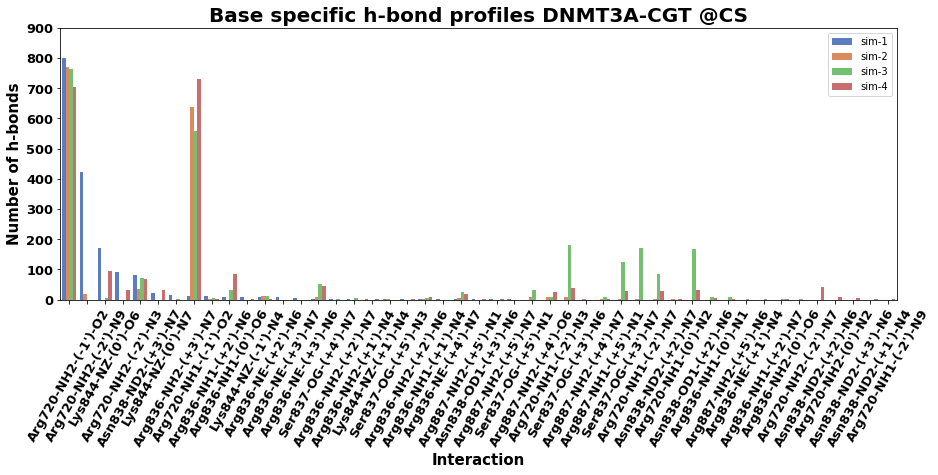

In [91]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import csv

plt.figure(figsize=(15,5))
ax = sns.barplot(x="atom_pair", y="atom_freq", hue="Type", palette="muted", data=cpg_comp_compl)
plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.ylim(ymax = 900, ymin = 0)
plt.xlabel('Interaction', fontsize=15, fontweight='bold')
plt.ylabel('Number of h-bonds',fontsize=15, fontweight='bold')
plt.title("Base specific h-bond profiles DNMT3A-CGT @CS",fontsize=20, fontweight='bold')

plt.savefig("3a-cgt-comp-atom-C.pdf", dpi=600, bbox_inches='tight', format="pdf")

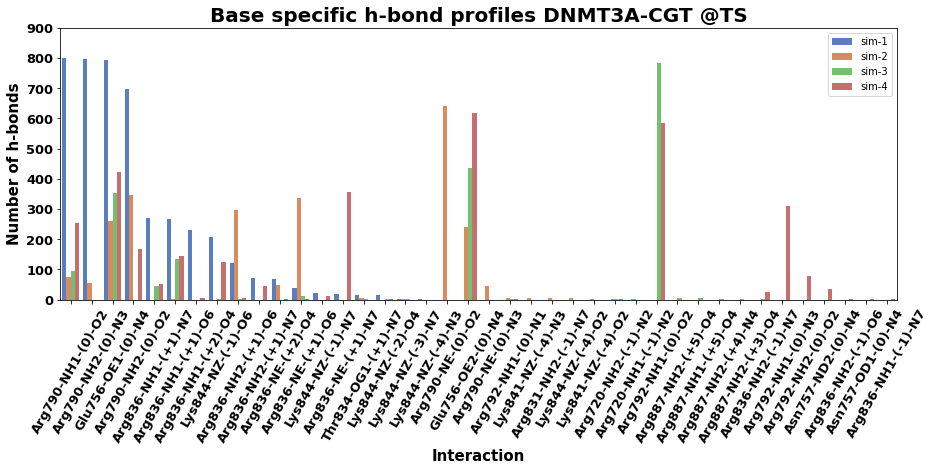

In [92]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import csv

plt.figure(figsize=(15,5))
ax = sns.barplot(x="atom_pair", y="atom_freq", hue="Type", palette="muted", data=cpg_comp_target)
plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.xticks(fontsize=13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.ylim(ymax = 900, ymin = 0)
plt.xlabel('Interaction', fontsize=15, fontweight='bold')
plt.ylabel('Number of h-bonds',fontsize=15, fontweight='bold')
plt.title("Base specific h-bond profiles DNMT3A-CGT @TS",fontsize=20, fontweight='bold')

plt.savefig("3a-cgt-comp-atom-T-f.pdf", dpi=600, bbox_inches='tight', format="pdf")